In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , make_scorer
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier 
from sklearn.model_selection import train_test_split

In [2]:
df_initial = pd.read_csv('C:\\Users\\sepan\\Desktop\\diabetes_prediction_dataset.csv')

In [3]:
df_initial.shape

(100000, 9)

In [4]:
df = df_initial.sample(n = 1000 , random_state=42)

In [5]:
df.shape

(1000, 9)

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
75721,Female,13.0,0,0,No Info,20.82,5.8,126,0
80184,Female,3.0,0,0,No Info,21.00,5.0,145,0
19864,Male,63.0,0,0,former,25.32,3.5,200,0
76699,Female,2.0,0,0,never,17.43,6.1,126,0
92991,Female,33.0,0,0,not current,40.08,6.2,200,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 75721 to 4151
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1000 non-null   object 
 1   age                  1000 non-null   float64
 2   hypertension         1000 non-null   int64  
 3   heart_disease        1000 non-null   int64  
 4   smoking_history      1000 non-null   object 
 5   bmi                  1000 non-null   float64
 6   HbA1c_level          1000 non-null   float64
 7   blood_glucose_level  1000 non-null   int64  
 8   diabetes             1000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 78.1+ KB


In [8]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df['smoking_history'].unique()

array(['No Info', 'former', 'never', 'not current', 'current', 'ever'],
      dtype=object)

In [10]:
labal_encoder = LabelEncoder()
df['smoking_history'] = labal_encoder.fit_transform(df['smoking_history'])
df['gender'] = labal_encoder.fit_transform(df['gender'])

In [11]:
df['gender'].unique()

array([0, 1])

In [12]:
df['smoking_history'].unique()

array([0, 3, 4, 5, 1, 2])

In [13]:
df['age'] = df['age'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 75721 to 4151
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1000 non-null   int32  
 1   age                  1000 non-null   int32  
 2   hypertension         1000 non-null   int64  
 3   heart_disease        1000 non-null   int64  
 4   smoking_history      1000 non-null   int32  
 5   bmi                  1000 non-null   float64
 6   HbA1c_level          1000 non-null   float64
 7   blood_glucose_level  1000 non-null   int64  
 8   diabetes             1000 non-null   int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 66.4 KB


In [15]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

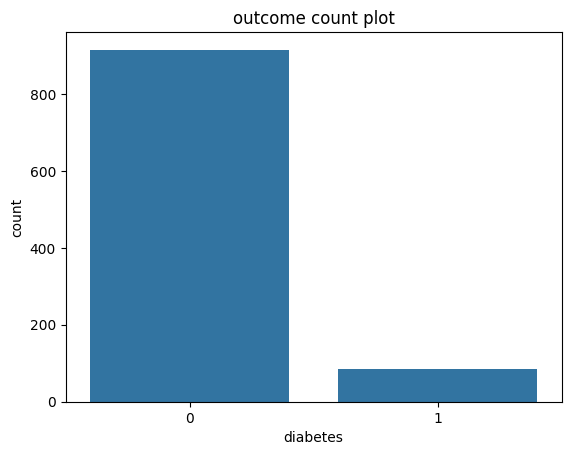

In [16]:
sns.countplot(x='diabetes', data= df )
plt.title('outcome count plot')
plt.show()

In [17]:
y = df['diabetes']
X = df.drop(columns=['diabetes'])

In [18]:
print('class distribution befor SMOTE : ')
print(y.value_counts())

smote = SMOTE(sampling_strategy='auto', random_state=42)
X,y = smote.fit_resample(X,y)
print('\nclass distribution after SMOTE : ')
print(pd.Series(y).value_counts())

class distribution befor SMOTE : 
diabetes
0    915
1     85
Name: count, dtype: int64

class distribution after SMOTE : 
diabetes
0    915
1    915
Name: count, dtype: int64


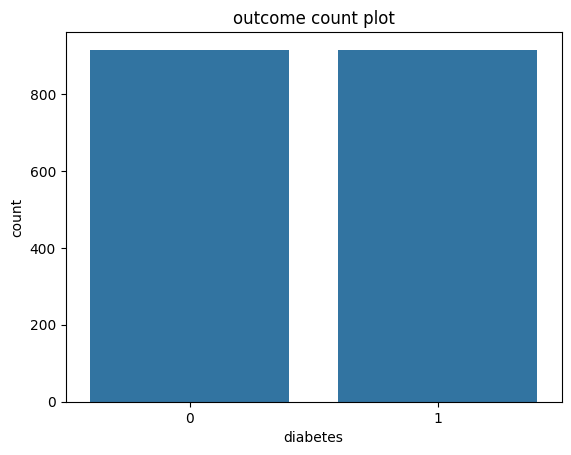

In [19]:
df = pd.concat([X,y], axis=1)
sns.countplot(x='diabetes', data= df )
plt.title('outcome count plot')
plt.show()

In [20]:
corrent = df.corr()
corrent

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.119279,-0.018825,0.064275,-0.115068,-0.131216,-0.060685,-0.106714,-0.190422
age,-0.119279,1.000000,0.130874,0.150115,0.152774,0.306462,0.346372,0.159466,0.527050
hypertension,-0.018825,0.130874,1.000000,0.143807,0.100672,0.110137,-0.052448,-0.004562,-0.021147
heart_disease,0.064275,0.150115,0.143807,1.000000,0.021455,-0.020817,-0.056905,-0.052465,-0.043159
smoking_history,-0.115068,0.152774,0.100672,0.021455,1.000000,0.147483,0.003823,0.067327,0.005594
bmi,-0.131216,0.306462,0.110137,-0.020817,0.147483,1.000000,0.228435,0.247453,0.405324
HbA1c_level,-0.060685,0.346372,-0.052448,-0.056905,0.003823,0.228435,1.000000,0.303621,0.631355
blood_glucose_level,-0.106714,0.159466,-0.004562,-0.052465,0.067327,0.247453,0.303621,1.000000,0.468012
diabetes,-0.190422,0.527050,-0.021147,-0.043159,0.005594,0.405324,0.631355,0.468012,1.000000


<Axes: >

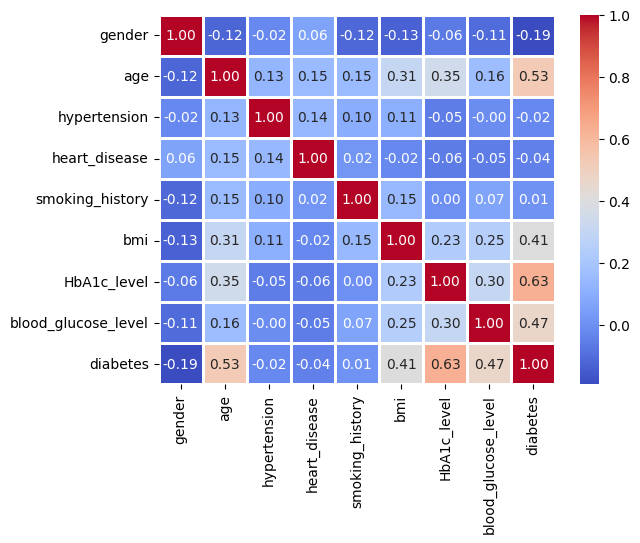

In [21]:
sns.heatmap(data = corrent ,annot=True, linewidth=.9 ,fmt='0.2f', cmap='coolwarm')

age_group
61-80     702
41-60     543
21-40     313
0-20      209
81-100     63
Name: count, dtype: int64


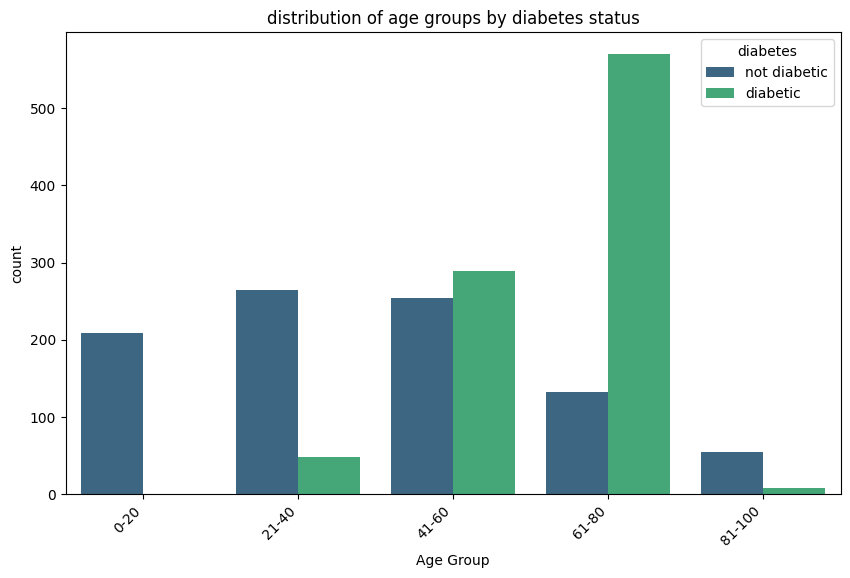

In [22]:
age_bins =  [0 , 20 , 40 , 60 ,80 ,100]
age_labels = ['0-20','21-40','41-60','61-80','81-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels,right = False)
print(df['age_group'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x ='age_group', hue='diabetes', data=df ,order = age_labels , palette='viridis')
plt.xticks(rotation=45 , ha ='right')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.title('distribution of age groups by diabetes status')
plt.legend(title='diabetes',loc='upper right', labels=['not diabetic','diabetic'])
plt.show()

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [25]:
param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X,y)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 250}
best cross-validated accuracy:  0.9748633879781421


In [26]:
param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X,y)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 250}
best cross-validated accuracy:  0.9688524590163935


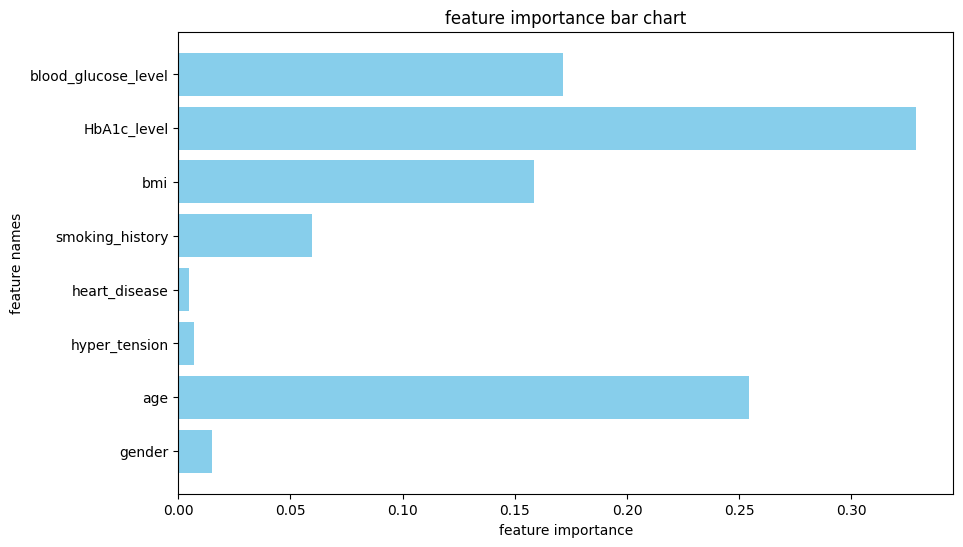

In [27]:
model =RandomForestClassifier(n_estimators=250 , random_state=42)
model.fit(X,y)
feature_importances = model.feature_importances_
feauture_names = ['gender', 'age', 'hyper_tension','heart_disease', 'smoking_history','bmi','HbA1c_level', 'blood_glucose_level']
plt.figure(figsize=(10,6))
plt.barh(feauture_names,feature_importances,color='skyblue')
plt.xlabel('feature importance')
plt.ylabel('feature names')
plt.title('feature importance bar chart')
plt.show()

In [28]:
X_train, X_test , y_train, y_test = train_test_split(X ,y , test_size = 0.2, random_state=42)


In [29]:
model = RandomForestClassifier(n_estimators=250 , random_state=42)
model.fit(X_train,y_train)
y_perd = model.predict(X_test)
accuracy = accuracy_score(y_test,y_perd)*100
precision = precision_score(y_test,y_perd)*100
recall = recall_score(y_test,y_perd)*100
f1 = f1_score(y_test,y_perd)*100

print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')

Accuracy :  96.17%
precision :  93.91%
recall :  98.93%
F1 score :  96.35%


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( random_state=42)
model.fit(X_train,y_train)
y_perd = model.predict(X_test)
accuracy = accuracy_score(y_test,y_perd)*100
precision = precision_score(y_test,y_perd)*100
recall = recall_score(y_test,y_perd)*100
f1 = f1_score(y_test,y_perd)*100

print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')

Accuracy :  91.80%
precision :  89.85%
recall :  94.65%
F1 score :  92.19%


In [31]:
#بر روی دیتا های جدید عملکرد مناسبی نداشت

model = AdaBoostClassifier(n_estimators=250 , random_state=42)
model.fit(X_train,y_train)
y_perd = model.predict(X_test)
accuracy = accuracy_score(y_test,y_perd)*100
precision = precision_score(y_test,y_perd)*100
recall = recall_score(y_test,y_perd)*100
f1 = f1_score(y_test,y_perd)*100

print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')

Accuracy :  97.27%
precision :  95.85%
recall :  98.93%
F1 score :  97.37%


In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( random_state=42)
model.fit(X_train,y_train)
y_perd = model.predict(X_test)
accuracy = accuracy_score(y_test,y_perd)*100
precision = precision_score(y_test,y_perd)*100
recall = recall_score(y_test,y_perd)*100
f1 = f1_score(y_test,y_perd)*100

print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')

Accuracy :  95.63%
precision :  94.30%
recall :  97.33%
F1 score :  95.79%


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier(n_estimators=250 , random_state=42)
model.fit(X_train,y_train)
y_perd = model.predict(X_test)
accuracy = accuracy_score(y_test,y_perd)*100
precision = precision_score(y_test,y_perd)*100
recall = recall_score(y_test,y_perd)*100
f1 = f1_score(y_test,y_perd)*100

print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')

Accuracy :  96.99%
precision :  94.90%
recall :  99.47%
F1 score :  97.13%


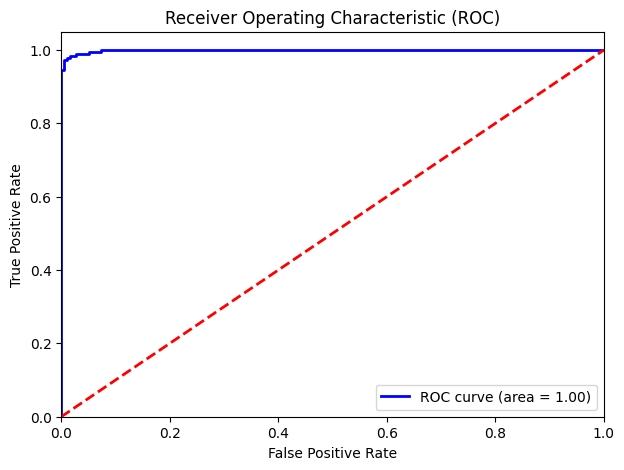

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score #confusion_matrix
y_pred_proba = model.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

C:\Users\sepan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


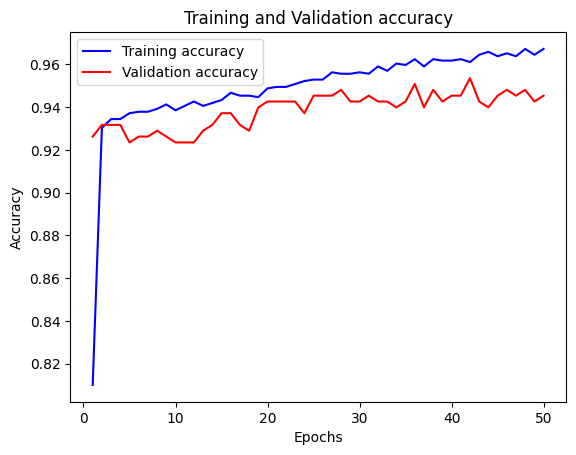

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.9496 - loss: 0.1186
Neural Network Accuracy: 0.9453551769256592


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam , SGD
import matplotlib.pyplot as plt
model = Sequential()
model.add(Dense(, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
loss, accuracy_nn = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy_nn)

In [43]:
new_data = pd.DataFrame({

  'gender' : [1], 'age':[69], 'hypertension':[0],'heart_disease':[0], 'smoking_history':[0],'bmi':[29.55],'HbA1c_level':[6.1], 'blood_glucose_level':[200]

})
#famel = 0 , male = 1
#No Info=0 ,current=1, ever=2, former =3, never = 4, not current=5
new_data_scaled = scaler.transform(new_data)
# Model prediction from new data

prediction = model.predict(new_data_scaled)

print('Prediction for new data: ', prediction*100, '% diabetic')

#1.00 = diabetic , 0.00 = not diabetic

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction for new data:  [[68.95476]] % diabetic
